<a href="https://www.kaggle.com/code/bnzn261029/housing-eda?scriptVersionId=148353161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv(
    "/kaggle/input/apartment-rental-offers-in-germany/immo_data.csv",
    converters={'geo_plz': str},
)

In [3]:
housing.shape

(268850, 49)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

# Select Target Variable

In [5]:
# baseRent is superior target variable as it has no missing values
housing.baseRent.isna().sum()

0

In [6]:
# predicting serviceCharge is not of interest for our business problem
housing.serviceCharge

0         245.00
1         134.00
2         255.00
3          58.15
4         138.00
           ...  
268845     90.00
268846    220.00
268847    220.00
268848    175.00
268849    315.00
Name: serviceCharge, Length: 268850, dtype: float64

In [7]:
# totalRent contains missing values
(housing.totalRent - housing.baseRent)

0         245.0
1           NaN
2         335.0
3           NaN
4         138.0
          ...  
268845     90.0
268846    220.0
268847    280.0
268848    175.0
268849      NaN
Length: 268850, dtype: float64

# Target Variable Preparation - Removing Outliers

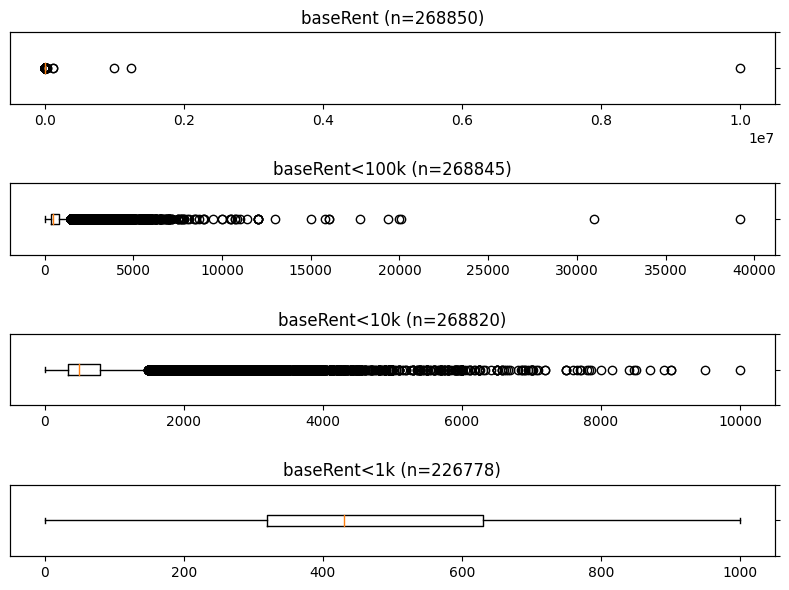

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 6), sharey=True)

# Create boxplots for each dataset
axes[0].boxplot(housing.baseRent, vert=False)
axes[1].boxplot(housing.baseRent[housing.baseRent<100000], vert=False)
axes[2].boxplot(housing.baseRent[housing.baseRent<10000], vert=False)
axes[3].boxplot(housing.baseRent[housing.baseRent<1000], vert=False)

# Set titles for each subplot
axes[0].set_title(f"baseRent (n={len(housing.baseRent)})")
axes[1].set_title(f"baseRent<100k (n={(housing.baseRent<100000).sum()})")
axes[2].set_title(f"baseRent<10k (n={(housing.baseRent<10000).sum()})")
axes[3].set_title(f"baseRent<1k (n={(housing.baseRent<1000).sum()})")

# Create separate y-axes
for i, ax in enumerate(axes):
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticklabels([])
    ax2.grid(False)

# Remove original y-axis ticks and labels
for ax in axes:
    ax.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
tmp = len(housing)
housing = housing[housing.baseRent>100]
housing = housing[housing.baseRent<2000]
print("removed", tmp - len(housing), "outliers")

removed 5605 outliers


# Select Features

In [10]:
columns_to_drop = ["streetPlain", "scoutId", "picturecount", "livingSpace", "noRooms", "baseRentRange"]
housing = housing[[col for col in housing.columns if col not in columns_to_drop]]

predictors = [col for col in housing.columns \
              if (housing[col].isna().sum()==0 and housing[col].dtype not in ['O', 'bool'])]


housing = housing[predictors]

# check for skewed distributions
housing.kurt()

baseRent            1.509164
noRoomsRange       -0.064186
livingSpaceRange    0.309131
dtype: float64

# Train Model

In [11]:
! pip install sketch -q

In [12]:
import sketch

In [13]:
# housing.sketch.howto("build a linear regression model to predict base rent, evaluate its accuracy and save the model to a local file?")

# import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# split data into features and target
X = housing.drop(columns=['baseRent'])
y = housing['baseRent']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build linear regression model 
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate model accuracy 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse) 
print('R-squared:', r2) 

# save model to local file 
pickle.dump(model, open('linearregressionmodel.sav', 'wb')) 

# prior to feature engineering
# Mean Squared Error: 469152.16069106566
# R-squared: -0.787233512176845

# following feature engineering
# Mean Squared Error: 14706.808961113788
# R-squared: 0.8886354991845892

Mean Squared Error: 70097.3425050183
R-squared: 0.4692012674402044


# Compare Different Models

In [14]:
# housing.sketch.howto("train several model to predict baseRent and choose the model that is best.")

#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#split data into training and test sets
X = housing.drop('baseRent', axis=1)
y = housing['baseRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
print('Linear Regression MSE:', lr_mse)

#train random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
print('Random Forest MSE:', rf_mse)

#compare models and choose the best one 
if lr_mse < rf_mse:  #if linear regression has lower MSE than random forest 
    print('Linear Regression is the best model.')  #then it is the best model 
else:  #otherwise 
    print('Random Forest is the best model.')  #random forest is the best model

Linear Regression MSE: 70097.3425050183
Random Forest MSE: 67725.73363010318
Random Forest is the best model.


# Hyperparameter Optimization

In [15]:
# # housing.sketch.howto("train a random forest model to predict baseRent and improve the model using hyperparameter optimization")

# #import necessary libraries
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# #instantiate random forest model
# rf = RandomForestRegressor()

# #define hyperparameters to optimize
# param_grid = { 
# #     'n_estimators': [200, 500],
# #     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [4, 5, 6, 7],
#     'criterion' :['squared_error', 'absolute_error']
# }

# #instantiate grid search model with random forest model and hyperparameters defined above 
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# #fit the grid search model to the data 
# grid_search.fit(X, y)

In [16]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# best_score = grid_search.best_score_
# cv_results = grid_search.cv_results_

In [17]:
# Define hyperparameters to try
n_estimators_list = [50, 100, 200]
max_depth_list = [3, 5, 10]

best_model = None
best_mse = float('inf')

# Iterate through hyperparameters
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Initialize the model with chosen hyperparameters
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        print(max_depth, n_estimators, mse)
        
        # Check if this combination of hyperparameters is the best so far
        if mse < best_mse:
            best_mse = mse
            best_model = model

3 50 68900.75361786415
5 50 67738.49185710376
10 50 67726.6178014648
3 100 68901.00176101988
5 100 67736.88757755233
10 100 67727.0416326527
3 200 68898.02918184723
5 200 67736.46315692608
10 200 67726.62687141568


In [18]:
best_mse, best_model

(67726.6178014648,
 RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42))

In [19]:
import pickle

pickle.dump(best_model, open('model.pkl', 'wb')) 

# Predict baseRent

In [20]:
# housing.sketch.howto("load a model from a pickled file and predict using custom values?")

# import necessary libraries
import pickle
import pandas as pd

# load the pickled model file
model = pickle.load(open('model.pkl', 'rb'))

# create a dataframe with custom values
custom_values = {'noRoomsRange': 3, 'livingSpaceRange': 4}
custom_df = pd.DataFrame(data=custom_values, index=[0])

# predict using the loaded model and custom values
prediction = model.predict(custom_df)
print(prediction)

[809.61110614]
